In [1]:
!pip install geopandas
!pip install geopy

In [2]:
# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

fp = "shopping_centers.txt"

# Read the data (replace "None" with your own code)
data = pd.read_csv(fp, sep=';')

In [3]:
from geopandas.tools import geocode

In [4]:
# Geocode the addresses using Nominatim
geo = geo = geocode(data['addr'], provider='nominatim', user_agent='gislover', timeout=4)

In [5]:
geo

,geometry,address
0,POINT (25.08294 60.21170),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va..."
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Keskust..."
2,POINT (24.73779 60.16294),"Sports Academy, 11, Piispansilta, Matinkylän k..."
3,POINT (24.81042 60.21752),"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä..."
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti..."
5,POINT (24.97904 60.18702),"Silta, 5, Hermannin rantatie, Verkkosaari, Kal..."
6,GEOMETRYCOLLECTION EMPTY,None


In [6]:
geo = geo.to_crs(epsg=3879)

In [7]:
# Join the tables
geodata = geo.join(data)

In [8]:
geodata

,geometry,address,id,name,addr
0,POINT (25504598.602 6677662.109),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1000,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,POINT (25496573.542 6672878.360),"Salaattiasema, 14-20, Mannerheimintie, Keskust...",1001,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland"
2,POINT (25485440.532 6672255.563),"Sports Academy, 11, Piispansilta, Matinkylän k...",1002,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"
3,POINT (25489491.076 6678322.265),"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...",1003,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland"
4,POINT (25497943.932 6686656.982),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",1004,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland"
5,POINT (25498837.156 6674909.983),"Silta, 5, Hermannin rantatie, Verkkosaari, Kal...",1005,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland"
6,GEOMETRYCOLLECTION EMPTY,None,1006,Mall of Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland"


In [9]:
# Define output filepath
out_fp = "shopping_centers.shp"

# Save file
geodata.to_file(out_fp)

In [10]:
!pip install geojson

In [11]:
# Read population grid data for 2018 into a variable `pop`. 
# Remember to check the crs info! 
import geopandas as gpd
from pyproj import CRS
import requests
import geojson

# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

In [12]:
# Define crs
pop.crs = CRS.from_epsg(3879).to_wkt()

In [13]:
pop.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
# Change the name of a column
pop = pop.rename(columns={'asukkaita': 'pop18'})

# Subset columns
pop = pop[["pop18", "geometry"]]

In [15]:
pop.head()

,pop18,geometry
0,108,MULTIPOLYGON Z (((25476499.999 6674248.999 0.0...
1,273,MULTIPOLYGON Z (((25476749.997 6674498.998 0.0...
2,239,MULTIPOLYGON Z (((25476999.994 6675749.004 0.0...
3,202,MULTIPOLYGON Z (((25476999.994 6675499.004 0.0...
4,261,MULTIPOLYGON Z (((25476999.994 6675249.005 0.0...


In [16]:
!pip install rtree
!pip install pygeos

In [17]:
# Make a spatial join
join = gpd.sjoin(geodata, pop, how="inner", op="within")

In [18]:
join

,geometry,address,id,name,addr,index_right,pop18
1,POINT (25496573.542 6672878.360),"Salaattiasema, 14-20, Mannerheimintie, Keskust...",1001,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland",1652,125
2,POINT (25485440.532 6672255.563),"Sports Academy, 11, Piispansilta, Matinkylän k...",1002,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",489,352
3,POINT (25489491.076 6678322.265),"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...",1003,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",909,978
5,POINT (25498837.156 6674909.983),"Silta, 5, Hermannin rantatie, Verkkosaari, Kal...",1005,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland",1942,231


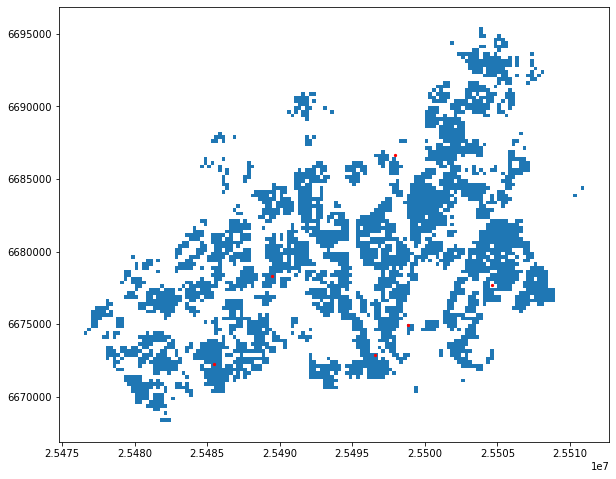

In [19]:
import matplotlib.pyplot as plt

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(15,8))

# Plot population grid
pop.plot(ax=ax)

# Plot points
geodata.plot(ax=ax, color='red', markersize=5)

In [21]:
!pip install mapclassify

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

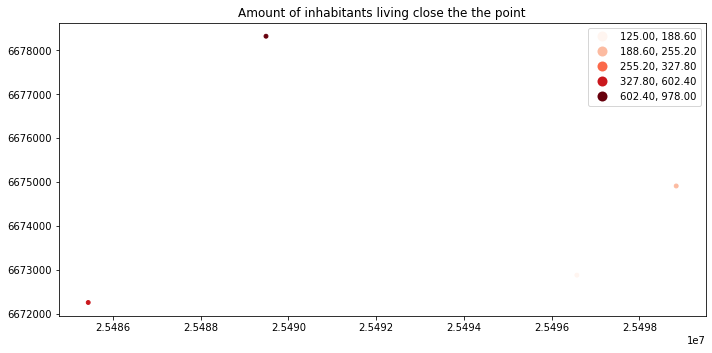

In [22]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the points with population info
join.plot(ax=ax, column='pop18', cmap="Reds", markersize=15, scheme='quantiles', legend=True);

# Add title
plt.title("Amount of inhabitants living close the the point");

# Remove white space around the figure
plt.tight_layout()

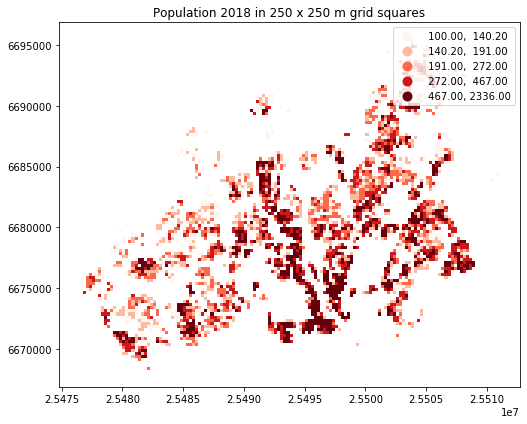

In [23]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the grid with population info
pop.plot(ax=ax, column='pop18', cmap="Red", scheme='quantiles', legend=True)
# Add title
plt.title("Population 2018 in 250 x 250 m grid squares");

# Remove white space around the figure
plt.tight_layout()